<a href="https://colab.research.google.com/github/deltorobarba/maths/blob/main/geometric_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geometric algebra, particularly spacetime algebra, is a powerful framework for describing geometry in various dimensions

using the spacetime algebra (STA), which includes basis vectors for time and space in special relativity

Basic Geometric Algebra Operations:
v1: GeometricVector([1 0 0])
v2: GeometricVector([0 1 0])
v3: GeometricVector([1 1 1])

Inner Products:
v1 · v2 = 0
v1 · v3 = 1

Outer Products (bivector components [e12, e23, e31]):
v1 ∧ v2 = [1 0 0]
v1 ∧ v3 = [ 1  0 -1]

Rotating v1 by 45° in xy-plane: GeometricVector([0.70710678 0.70710678 0.        ])


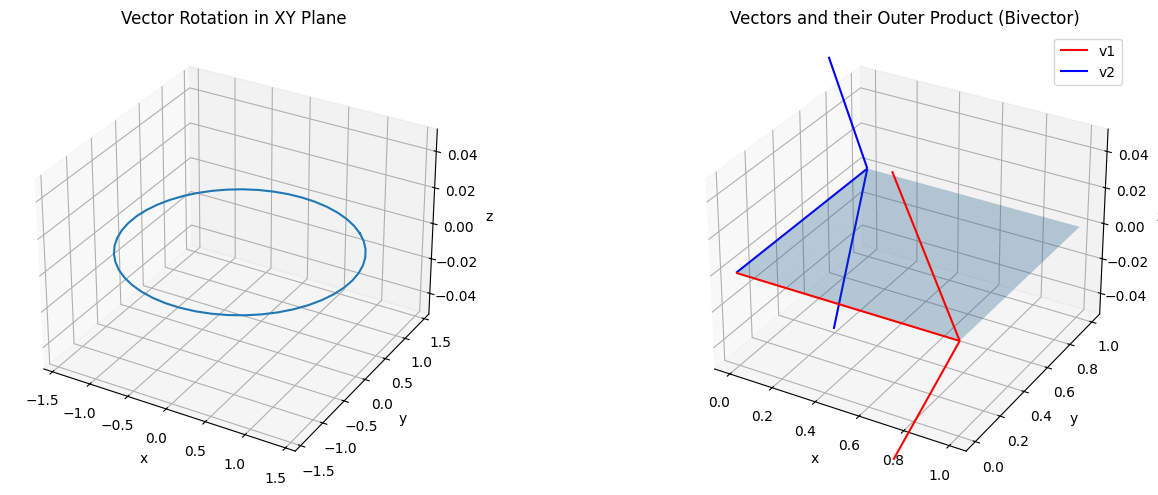

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# We'll implement some basic geometric algebra operations ourselves
# to demonstrate the concepts without depending on external libraries

class GeometricVector:
    def __init__(self, components):
        self.components = np.array(components)

    def __str__(self):
        return f"GeometricVector({self.components})"

    def inner_product(self, other):
        """Compute inner product (dot product)"""
        return np.dot(self.components, other.components)

    def outer_product(self, other):
        """Compute outer product (wedge product)
        Returns the bivector components in the form [e12, e23, e31]"""
        x1, y1, z1 = self.components
        x2, y2, z2 = other.components
        return np.array([
            x1*y2 - y1*x2,  # e12 component
            y1*z2 - z1*y2,  # e23 component
            z1*x2 - x1*z2   # e31 component
        ])

    def rotate(self, angle, plane='xy'):
        """Rotate vector by angle in specified plane"""
        if plane == 'xy':
            rotation_matrix = np.array([
                [np.cos(angle), -np.sin(angle), 0],
                [np.sin(angle), np.cos(angle), 0],
                [0, 0, 1]
            ])
        elif plane == 'yz':
            rotation_matrix = np.array([
                [1, 0, 0],
                [0, np.cos(angle), -np.sin(angle)],
                [0, np.sin(angle), np.cos(angle)]
            ])
        elif plane == 'zx':
            rotation_matrix = np.array([
                [np.cos(angle), 0, -np.sin(angle)],
                [0, 1, 0],
                [np.sin(angle), 0, np.cos(angle)]
            ])
        else:
            raise ValueError("Invalid plane specified")

        return GeometricVector(rotation_matrix @ self.components)

def visualize_rotation_and_outer_product():
    """Visualize vector rotation and outer product"""
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: Vector rotation
    ax1 = fig.add_subplot(121, projection='3d')
    v = GeometricVector([1, 1, 0])
    angles = np.linspace(0, 2*np.pi, 50)
    points = []

    for theta in angles:
        v_rot = v.rotate(theta)
        points.append(v_rot.components)

    points = np.array(points)
    ax1.plot(points[:, 0], points[:, 1], points[:, 2])
    ax1.set_title('Vector Rotation in XY Plane')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    # Plot 2: Outer product visualization
    ax2 = fig.add_subplot(122, projection='3d')
    v1 = GeometricVector([1, 0, 0])
    v2 = GeometricVector([0, 1, 0])
    bivector = v1.outer_product(v2)

    # Plot the vectors
    ax2.quiver(0, 0, 0, 1, 0, 0, color='r', label='v1')
    ax2.quiver(0, 0, 0, 0, 1, 0, color='b', label='v2')

    # Plot the plane spanned by the vectors
    xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
    zz = np.zeros_like(xx)
    ax2.plot_surface(xx, yy, zz, alpha=0.3)

    ax2.set_title('Vectors and their Outer Product (Bivector)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.legend()

    plt.tight_layout()
    return plt

def demonstrate_operations():
    # Create some vectors
    v1 = GeometricVector([1, 0, 0])  # Unit vector in x direction
    v2 = GeometricVector([0, 1, 0])  # Unit vector in y direction
    v3 = GeometricVector([1, 1, 1])  # Diagonal vector

    print("Basic Geometric Algebra Operations:")
    print(f"v1: {v1}")
    print(f"v2: {v2}")
    print(f"v3: {v3}")

    # Inner products
    print("\nInner Products:")
    print(f"v1 · v2 = {v1.inner_product(v2)}")
    print(f"v1 · v3 = {v1.inner_product(v3)}")

    # Outer products
    print("\nOuter Products (bivector components [e12, e23, e31]):")
    print(f"v1 ∧ v2 = {v1.outer_product(v2)}")
    print(f"v1 ∧ v3 = {v1.outer_product(v3)}")

    # Rotations
    angle = np.pi/4  # 45 degrees
    v_rotated = v1.rotate(angle)
    print(f"\nRotating v1 by 45° in xy-plane: {v_rotated}")

if __name__ == "__main__":
    demonstrate_operations()
    plt = visualize_rotation_and_outer_product()
    plt.show()

https://clifford.readthedocs.io/en/latest/api/generated/clifford.tools.g3c.html

https://pypi.org/project/galgebra/

https://github.com/pygae/galgebra

https://github.com/pygae

In [15]:
!pip install galgebra -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.4 MB/s eta 0:00:00


In [16]:
from sympy import symbols
from galgebra.ga import Ga

from galgebra.printer import Format
Format(Fmode = False, Dmode = True)

st4coords = (t,x,y,z) = symbols('t x y z', real=True)
st4 = Ga('e',
         g=[1,-1,-1,-1],
         coords=st4coords)

M = st4.mv('M','mv',f = True)

M.grade(3).Fmt(3,r'\langle \mathbf{M} \rangle _3')

\langle \mathbf{M} \rangle _3 =  M__txy*e_t^e_x^e_y
 + M__txz*e_t^e_x^e_z
 + M__tyz*e_t^e_y^e_z
 + M__xyz*e_x^e_y^e_z

In [18]:
import sympy
from galgebra.ga import Ga
from galgebra.printer import latex
from IPython.display import Math

# tell sympy to use our printing by default
sympy.init_printing(latex_printer=latex, use_latex='mathjax')

In [19]:
sympy.S('n')**2

 2
n 

In [20]:
Math(f"y = { latex(sympy.S('n')**2) }")

<IPython.core.display.Math object>

https://galgebra.readthedocs.io/en/latest/tutorials/algebra.html